<h3> GRIP internship #Oct2022 </h3>


# AUTHOR : ABHISHEK KUMAR SINGH

# GRIP - The Spark Foundation- Data Science & Business Analytics Internship

# Task 01 : Prediction Using Supervised Machine Learning

## Task 1: Predict the score of a student if he studied 9.25 hours per day

## Importing libraries

PANDAS: for data manuplation.

NUMPY: Working with arrays.

MATPLOTLIB & SEABORN: module for Data Visualisation.

SKLEARN: statistical modeling (machine learning library).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


<h3>Import the dataset</h3>

In [2]:
url = "http://bit.ly/w-data"
scores = pd.read_csv(url)

In [3]:
print("First 5 elements of the given dataset")
scores.head()

First 5 elements of the given dataset


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
print('Shapes ',scores.shape)
print ('Columns ',scores.columns)
print ('Columns Datatype ', scores.dtypes)

Shapes  (25, 2)
Columns  Index(['Hours', 'Scores'], dtype='object')
Columns Datatype  Hours     float64
Scores      int64
dtype: object


### Summary Statistics

In [5]:
scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Missing Values

In [6]:
scores.isnull().sum()

Hours     0
Scores    0
dtype: int64

<AxesSubplot:>

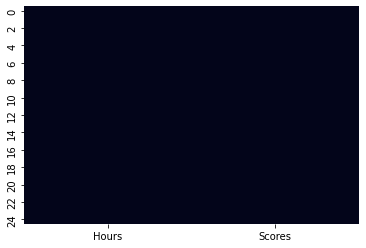

In [7]:
sns.heatmap(scores.isnull(), cbar=False)


## Observations:

No missing values.

## Outliers

In [8]:
#percentile of each Predictors
scores.quantile([0.01,.05,.10,.15 ,.25,.5,.8,.85,0.9,.95,.99,1])

,Hours,Scores
0.01,1.196,17.72
0.05,1.580,20.20
0.10,2.140,22.20
0.15,2.500,24.60
0.25,2.700,30.00
0.50,4.800,47.00
0.80,7.720,77.00
0.85,8.000,82.60
0.90,8.420,85.60
0.95,8.820,87.60


<AxesSubplot:>

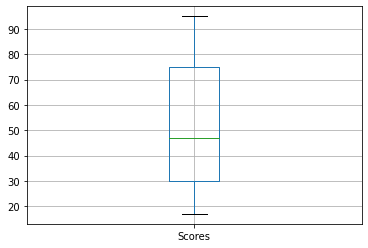

In [9]:
# to check the outliers in the data by plotting the boxplot
scores.boxplot(['Scores'])

<AxesSubplot:>

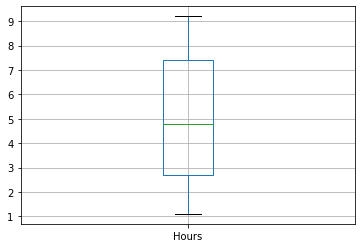

In [10]:
scores.boxplot(['Hours'])


**Observation:**

No outliers.

<h3>Visualizing Data</h3>


<AxesSubplot:xlabel='Scores', ylabel='Count'>

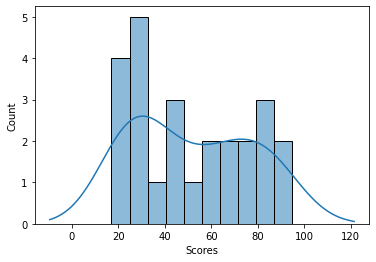

In [11]:
sns.histplot(scores['Scores'], bins=10, kde=True, kde_kws=dict(cut=2))


Since the Scores are almost normally distributed with a skew in the positive side , we will perform a Linear Regression for prediction.

<h3>Correlation Matrix</h3>

<AxesSubplot:>

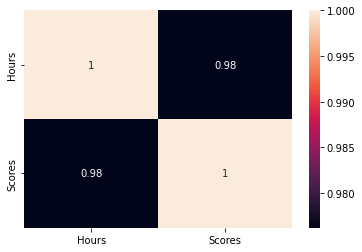

In [12]:
sns.heatmap(scores.corr(),annot=True)


there is a high Positive correlation between Hours and Scores.

<h3> Scatter Plot</h3>

Text(0, 0.5, 'Scores')

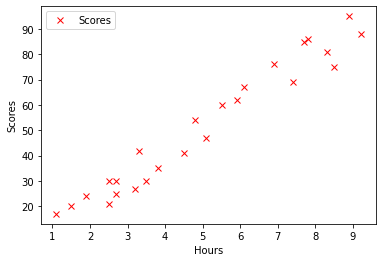

In [13]:
scores.plot(x = 'Hours', y = 'Scores', style = 'x',color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')



**Observations**

There is a positive linear relationship between hours and scores.

<h2>Training data for Linear Regression</h2>

In [14]:
x=scores.drop("Scores", axis=1)
y=scores['Scores']


<h3>Splitting the dataset into two subsets: train & test</h3>

In [15]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2)

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17, 1)
(17,)
(8, 1)
(8,)


<h3>Training Linear Regression Model</h3>

In [17]:
scores_reg = LinearRegression()
scores_reg.fit(x_train, y_train)

LinearRegression()

<h3>Predicting Scores</h3>

In [18]:
y_pred = scores_reg.predict(x_test)
y_pred

array([11.02900268, 25.62801721, 19.3712967 , 95.49472962, 71.51063432,
       27.71359072, 88.19522235, 25.62801721])

<h3>Evaluate the train score and test score of linear regression model </h3>

In [19]:
print('Training Score : ', scores_reg.score(x_train, y_train))
print('Test Score : ', scores_reg.score(x_test, y_test))

Training Score :  0.9496868783142939
Test Score :  0.9420584734434517


<h3>Compare Actual Score and Predicted Score</h3>

In [20]:
output = pd.DataFrame({'Actual Score': y_test,'Predicted Score': y_pred, 'Residual':y_test-y_pred })
print(output.head())

    Actual Score  Predicted Score  Residual
14            17        11.029003  5.970997
0             21        25.628017 -4.628017
17            24        19.371297  4.628703
6             88        95.494730 -7.494730
23            76        71.510634  4.489366



<h2>Model Evaluation (Actual Vs Predicted) </h2>

We will calculate some error metrics :

<h3>Mean Absolute Error  </h3>                       

In [21]:
print('Mean absolute error : ', metrics.mean_absolute_error(y_test, y_pred))

Mean absolute error :  5.936576124243742


<h3> Root Mean Square Error </h3>

In [22]:
print('Root mean square error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root mean square error :  6.665333111498132


<h3> Goodness of Fit- R2 </h3>

In [23]:
metrics.r2_score(y_test,y_pred)

0.9420584734434517

**Observations**

The model is doing great
<h3> T-test </h3>

In [24]:
from scipy import stats
t_statistic, pvalues =stats.ttest_ind(y_test, y_pred)
print('t-statistic -->',t_statistic)
print('P-value -->',pvalues)

t-statistic --> -0.06749127427810271
P-value --> 0.9471450243074203


 p-value value says that the difference between mean of actual and the predicted values is near to zero.


<h3>F-Test</h3>

In [25]:
f_statistic, pvalues =stats.f_oneway(y_test, y_pred)
print('f-statistic -->',f_statistic)
print('P-value -->',pvalues)

f-statistic --> 0.004555072103682067
P-value --> 0.9471450243074162




F-statistic value means that the variance of error is acceptable with 95% confidance interval.


<h2>Predict the score of a student if he studied 9.25 hours per day</h2>

In [26]:
hours = 9.25
score_pred = scores_reg.predict([[hours]])
print("Number of hours = {}".format(hours))
print("Predicted scores = {}".format(score_pred[0]))

Number of hours = 9.25
Predicted scores = 96.01612299632009


c:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
